In [1]:
import os.path as osp
import os
import data.imgs as img_data
from matplotlib import pyplot as plt

In [2]:
month_strings_S1 = ["S1_" + f"{x:02}" + ".tif" for x in range(0,12)]
month_strings_S2 = ["S2_" + f"{x:02}" + ".tif" for x in range(0,12)]

In [3]:
month_count_s1 = [0] * 12
month_count_s2 = [0] * 12

train_data_path = osp.join(osp.dirname(img_data.__file__), "train_features")
directory = os.fsencode(train_data_path)

c = 0
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    # print(filename)

    for ind, name in enumerate(month_strings_S1):
        if filename.endswith(name):
            month_count_s1[ind] += 1

    for ind, name in enumerate(month_strings_S2):
        if filename.endswith(name):
            month_count_s2[ind] += 1

In [9]:
def bar_plot(ax, data, plot_name, colors=None, total_width=0.8, single_width=1, legend=True):
    if colors is None:
        colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=colors[i % len(colors)])

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        ax.legend(bars, data.keys(), loc='lower right')

    ax.set_title(plot_name)
    # ax.set_xticks(range(0,12))

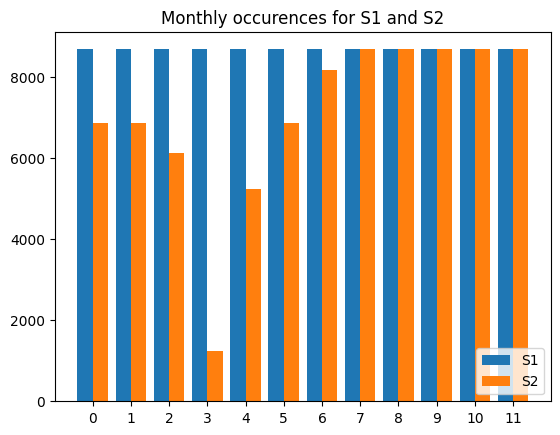

In [10]:
fig, ax = plt.subplots()
data = {"S1": month_count_s1, "S2": month_count_s2}
plot_name = "Monthly occurences for S1 and S2"
bar_plot(ax, data, plot_name)

In [11]:
from utils.data_generator.get_train_data import convert_path_to_gdal_dataset, convert_gdal_dataset_to_ndarray

bands_count_S1 = [0] * 4
bands_count_S2 = [0] * 11

for file in os.listdir(directory):
    filename = os.fsdecode(file)

    filepath = osp.join(train_data_path, filename)

    dataset = convert_path_to_gdal_dataset(filepath)
    data = convert_gdal_dataset_to_ndarray(dataset)

    if filename[9:11] == "S1":
        bands_count_S1[data.shape[0] - 1] += 1
    else:
        bands_count_S2[data.shape[0] - 1] += 1

In [12]:
print(bands_count_S1)
print(bands_count_S2)
print("CONCLUSION: There are no missing bands, as in whenever there exists data for a month, that data is complete.")

[0, 0, 0, 104268]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 84810]
CONCLUSION: There are no missing bands, as in whenever there exists data for a month, that data is complete.


In [14]:
bands_count_S1 = [0] + bands_count_S1
bands_count_S2 = [0] + bands_count_S2

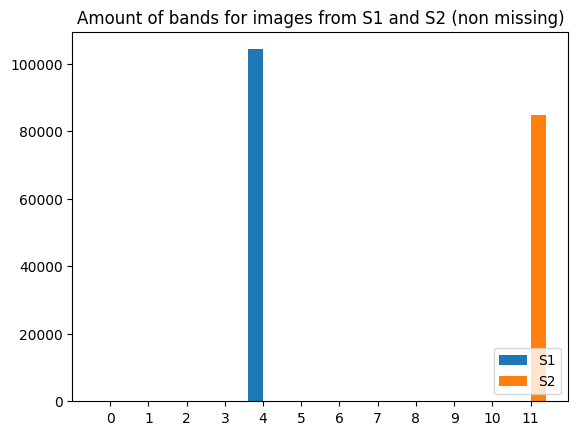

In [15]:
fig, ax = plt.subplots()
data = {"S1": bands_count_S1, "S2": bands_count_S2}
plot_name = "Amount of bands for images from S1 and S2 (non missing)"
bar_plot(ax, data, plot_name)